### [ 1110 과제 ]
- [과제1] 여름이 길어지고 겨울이 짧아짐
    1) 지구온난화 현상 => 다른지역은
우선 여름 기준 온도가 몇인지 찾기 => 일평균20도 이상인 일수를 여름이라고 함.
그리고 실제로 여름이 길어지고 있는지 확인 하는것
데이터는 기간 더 길게....대구지역으로 => 일단은 2001 ~ 2025까지

- [과제2] 대구 지역의 인구 / 구별로
    1) 성별 인구 비율
    2) 투표 가능 인구
    3) 학령 인구

In [1]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 과제1 <hr>

In [2]:
## 과제1
## [과제] 여름이 길어지고 겨울이 짧아짐
## 1) 지구온난화 현상 => 다른지역은
## 우선 여름 기준 온도가 몇인지 찾기 => 일평균20도 이상인 일수를 여름이라고 함.
## 그리고 실제로 여름이 길어지고 있는지 확인 하는것
## 데이터는 기간 더 길게....대구지역으로 => 일단은 2001 ~ 2025까지


## 파일 읽어오기
# 1925 ~ 2025년까지 총 100년 데이터
dgDF = pd.read_csv('../data/대구_기온_19250109_2025.11.09.csv', skiprows=7) # 처음에 불필요한 값 있어서 버리기
dgDF.head()


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1925-01-09,143,-2.9,-7.4,0.4
1,\t1925-01-10,143,-2.2,-7.5,6.5
2,\t1925-01-11,143,-1.0,-7.9,5.2
3,\t1925-01-12,143,-2.9,-7.0,2.1
4,\t1925-01-13,143,-4.4,-10.2,1.8


In [3]:
## 날짜에 \t랑 + 지점 제거하기
dgDF = dgDF.drop(['지점'], axis='columns')

dgDF.날짜 = dgDF.날짜.str.strip('\t')
dgDF

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1925-01-09,-2.9,-7.4,0.4
1,1925-01-10,-2.2,-7.5,6.5
2,1925-01-11,-1.0,-7.9,5.2
3,1925-01-12,-2.9,-7.0,2.1
4,1925-01-13,-4.4,-10.2,1.8
...,...,...,...,...
36825,2025-11-05,11.8,5.4,20.2
36826,2025-11-06,12.8,6.7,21.2
36827,2025-11-07,13.1,7.7,20.6
36828,2025-11-08,12.9,7.8,18.3


In [4]:
## 결측치 확인
# 결측치 총 개수 확인
display(dgDF.isna().sum())

# 정확한 값 확인
display(dgDF[dgDF.isna().any(axis=1)])

# 결측치 이전값으로 치환하기
dgDF.ffill(inplace=True)

## 확인 -> 해보니 결측치 채워짐
# dgDF[dgDF.isna().any(axis=1)]

날짜         0
평균기온(℃)    1
최저기온(℃)    2
최고기온(℃)    4
dtype: int64

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
15381,1967-02-19,1.0,NaN,NaN
17812,1973-10-16,12.0,NaN,NaN
32406,2013-09-30,NaN,20.1,NaN
36202,2024-02-21,5.1,3.6,NaN


In [5]:
## 중복값 확인
dgDF[1:].duplicated().sum() ## 중복값없음

np.int64(0)

In [6]:
## 이상치 체크
import sys
sys.path.append(r'C:\Users\qjadl\Desktop\KDT10\EX_DATA_ANALYSYS\Utils')
import datautil as du

## 수치컬럼의 이상치 검사
numeric_cols = dgDF.select_dtypes(include='number') ## 숫자인 열만 출력
du.get_outlier_records(dgDF, numeric_cols)

[]

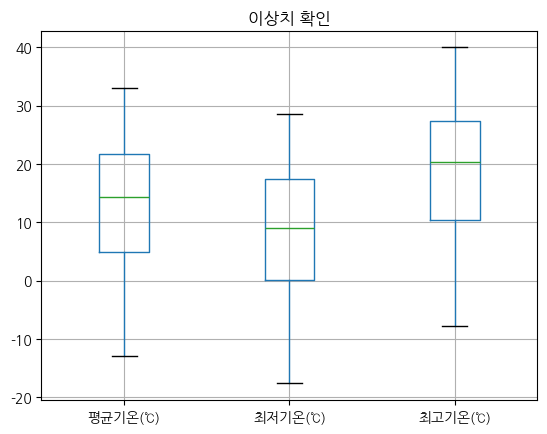

In [7]:
## 박스 플롯으로 이상치 시각화
dgDF.boxplot()

plt.title('이상치 확인')
plt.show()

In [8]:
dgDF.날짜 = pd.to_datetime(dgDF.날짜)
dgDF.info()
dgDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36830 entries, 0 to 36829
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       36830 non-null  datetime64[ns]
 1   평균기온(℃)  36830 non-null  float64       
 2   최저기온(℃)  36830 non-null  float64       
 3   최고기온(℃)  36830 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1925-01-09,-2.9,-7.4,0.4
1,1925-01-10,-2.2,-7.5,6.5
2,1925-01-11,-1.0,-7.9,5.2
3,1925-01-12,-2.9,-7.0,2.1
4,1925-01-13,-4.4,-10.2,1.8


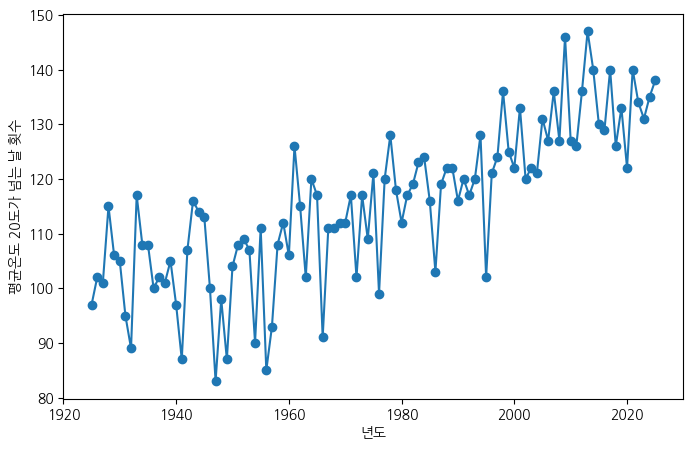

In [9]:
# 연/월별로 묶기
dgDF['년'] = dgDF['날짜'].dt.year
dgDF['월'] = dgDF['날짜'].dt.month
dgDF.head()

# 그룹화
gb = dgDF.groupby(by=['년'], observed=True)['평균기온(℃)'].apply(lambda x: x>20)
# gb

# True 개수 세기 즉, 20도 넘는 날의 횟수임
count_year = gb.groupby(level='년').sum()
# count_year

plt.figure(figsize=(8,5))
plt.plot(count_year.index, count_year, marker='o')
# plt.bar(count_year.index, count_year)
plt.xlabel('년도')
plt.ylabel('평균온도 20도가 넘는 날 횟수')
plt.show()

## [과제2] <hr>

In [10]:
## 과제2
## [과제] 대구 지역의 인구/구별로 -> 동구 / 중구 / 남구 / 서구 / 북구
# 1) 성별 인구 비율
# 2) 투표 가능 인구
# 3) 학령 인구 (6세 ~ 21세)

# 데이터 읽어오기
df = pd.read_csv('../data/대구_연령별인구현황_월간.csv')
df

,행정구역,2025년10월_계_총인구수,2025년10월_계_연령구간인구수,2025년10월_계_0세,2025년10월_계_1세,2025년10월_계_2세,2025년10월_계_3세,2025년10월_계_4세,2025년10월_계_5세,2025년10월_계_6세,...,2025년10월_여_91세,2025년10월_여_92세,2025년10월_여_93세,2025년10월_여_94세,2025년10월_여_95세,2025년10월_여_96세,2025년10월_여_97세,2025년10월_여_98세,2025년10월_여_99세,2025년10월_여_100세 이상
0,대구광역시 (2700000000),"2,355,677","2,355,677","10,742","10,341","10,209","11,150","11,887","13,001","14,625",...,"2,331","1,747","1,407",993,736,525,367,254,133,243
1,대구광역시 중구 (2711000000),"100,833","100,833",940,843,763,820,722,794,811,...,90,73,66,34,27,17,22,14,2,19
2,대구광역시 동구 (2714000000),"339,631","339,631","1,715","1,635","1,593","1,692","1,787","1,861","2,047",...,392,284,213,158,108,87,58,39,16,45
3,대구광역시 서구 (2717000000),"163,395","163,395",673,609,587,609,596,633,691,...,183,131,120,91,63,33,35,24,8,20
4,대구광역시 남구 (2720000000),"135,692","135,692",473,460,464,445,462,517,495,...,208,152,112,92,57,63,36,20,13,24
5,대구광역시 북구 (2723000000),"410,934","410,934","1,788","1,683","1,627","1,853","1,944","2,126","2,340",...,353,280,217,158,117,75,58,42,23,39
6,대구광역시 수성구 (2726000000),"409,491","409,491","1,454","1,448","1,555","1,862","2,026","2,257","2,861",...,407,306,243,171,125,98,60,47,36,37
7,대구광역시 달서구 (2729000000),"518,434","518,434","2,217","2,101","2,044","2,109","2,419","2,606","2,982",...,390,321,262,162,139,93,62,38,20,32
8,대구광역시 달성군 (2771000000),"254,935","254,935","1,426","1,519","1,544","1,718","1,893","2,157","2,352",...,223,144,121,92,79,43,32,19,12,23
9,대구광역시 군위군 (2772000000),"22,332","22,332",56,43,32,42,38,50,46,...,85,56,53,35,21,16,4,11,3,4


In [11]:
## 앞에서 열 두개 drop하기
# df = df.drop(['2025년10월_계_총인구수','2025년10월_계_연령구간인구수'], axis=1)

df.columns = df.columns.str.replace('2025년10월_','')
df

# df.isna().sum() ## 결측치 없음
# df.duplicated() ## 중복값 없음

,행정구역,계_총인구수,계_연령구간인구수,계_0세,계_1세,계_2세,계_3세,계_4세,계_5세,계_6세,...,여_91세,여_92세,여_93세,여_94세,여_95세,여_96세,여_97세,여_98세,여_99세,여_100세 이상
0,대구광역시 (2700000000),"2,355,677","2,355,677","10,742","10,341","10,209","11,150","11,887","13,001","14,625",...,"2,331","1,747","1,407",993,736,525,367,254,133,243
1,대구광역시 중구 (2711000000),"100,833","100,833",940,843,763,820,722,794,811,...,90,73,66,34,27,17,22,14,2,19
2,대구광역시 동구 (2714000000),"339,631","339,631","1,715","1,635","1,593","1,692","1,787","1,861","2,047",...,392,284,213,158,108,87,58,39,16,45
3,대구광역시 서구 (2717000000),"163,395","163,395",673,609,587,609,596,633,691,...,183,131,120,91,63,33,35,24,8,20
4,대구광역시 남구 (2720000000),"135,692","135,692",473,460,464,445,462,517,495,...,208,152,112,92,57,63,36,20,13,24
5,대구광역시 북구 (2723000000),"410,934","410,934","1,788","1,683","1,627","1,853","1,944","2,126","2,340",...,353,280,217,158,117,75,58,42,23,39
6,대구광역시 수성구 (2726000000),"409,491","409,491","1,454","1,448","1,555","1,862","2,026","2,257","2,861",...,407,306,243,171,125,98,60,47,36,37
7,대구광역시 달서구 (2729000000),"518,434","518,434","2,217","2,101","2,044","2,109","2,419","2,606","2,982",...,390,321,262,162,139,93,62,38,20,32
8,대구광역시 달성군 (2771000000),"254,935","254,935","1,426","1,519","1,544","1,718","1,893","2,157","2,352",...,223,144,121,92,79,43,32,19,12,23
9,대구광역시 군위군 (2772000000),"22,332","22,332",56,43,32,42,38,50,46,...,85,56,53,35,21,16,4,11,3,4


In [12]:
## 1) 성별 인구 비율
# -> 구별로 남자 여자 계 출력하기
df['남_총인구수'] = df['남_총인구수'].str.replace(',','').astype('int')
df['여_총인구수'] = df['여_총인구수'].str.replace(',','').astype('int')
gb1 = df.groupby(['행정구역'])[['남_총인구수','여_총인구수']].sum()


Index(['대구광역시 군위군 (2772000000)', '대구광역시 남구 (2720000000)',
       '대구광역시 달서구 (2729000000)', '대구광역시 달성군 (2771000000)',
       '대구광역시 동구 (2714000000)', '대구광역시 북구 (2723000000)',
       '대구광역시 서구 (2717000000)', '대구광역시 수성구 (2726000000)',
       '대구광역시 중구 (2711000000)'],
      dtype='object', name='행정구역')

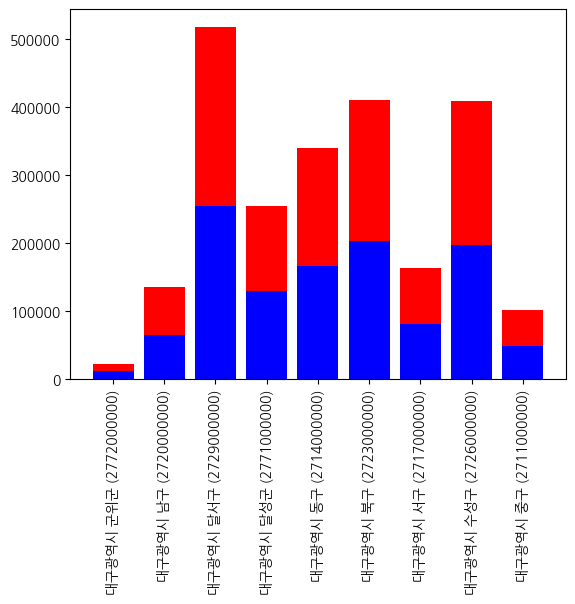

In [13]:
display(gb1.index[1:])
plt.bar(gb1.index[1:], gb1['남_총인구수'][1:], label='남', color='blue')
plt.bar(gb1.index[1:], gb1['여_총인구수'][1:], bottom=gb1['남_총인구수'][1:], label='여', color='red')
plt.xticks(rotation=90)
plt.show()

In [14]:
# 2) 투표 가능 인구 
# # -> 나이가 20세 이상 인구를 가져와서 그래프 그리기 (계에서 사용)
# df1 = df[df.columns[df.columns.str.contains('계')]] ## 원하는 컬럼만 df에서 추출해서 df1에 저장
# df1 = df1.iloc[:,:23]
# df1['행정구역'] = df['행정구역']

# df1[df1.columns] = df1[df1.columns].apply(lambda x: x.str.replace(',', ''), axis=0)
# df1.columns[:-1] = df1.columns[:-1].astype('int')
# display(df1)
# df1.info()

# gb = df1.iloc[:,2:24].groupby(by=['행정구역']).sum(numeric_only=True)
# display(gb)


C:\Users\qjadl\AppData\Local\Temp\ipykernel_25264\741047206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['행정구역'] = df['행정구역']
C:\Users\qjadl\AppData\Local\Temp\ipykernel_25264\741047206.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[data_columns] = df1[data_columns].apply(
C:\Users\qjadl\AppData\Local\Temp\ipykernel_25264\741047206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

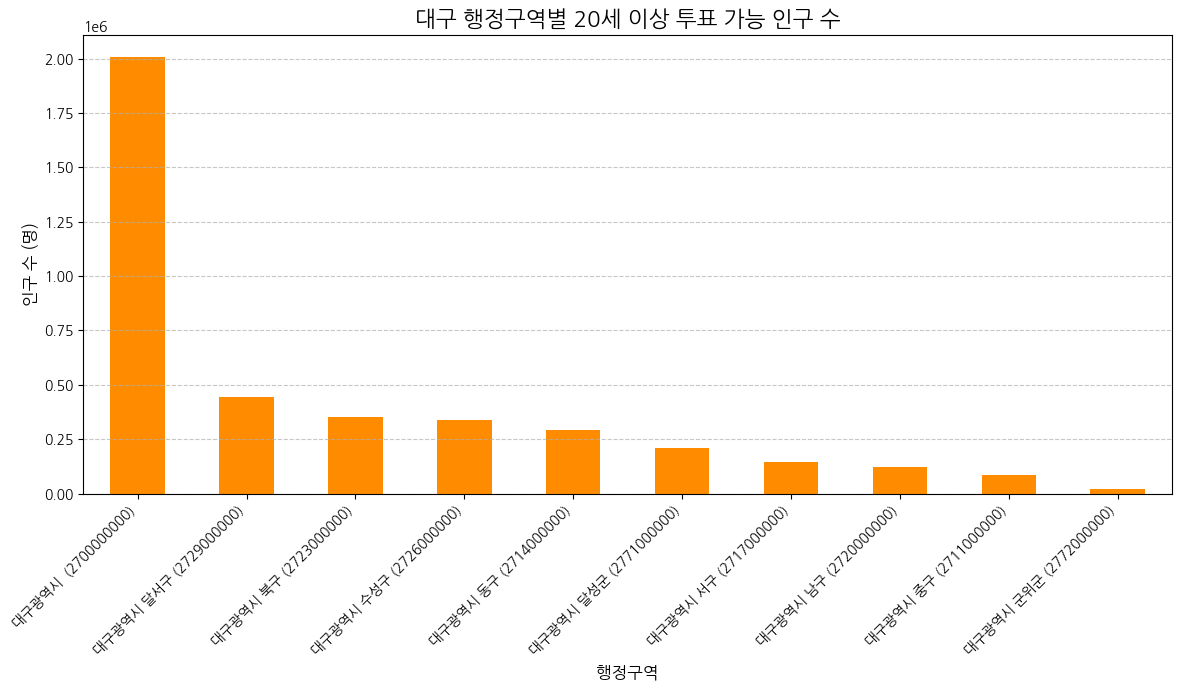


--- 20세 이상 투표 가능 인구 수 ---
행정구역
대구광역시  (2700000000)       2007299
대구광역시 달서구 (2729000000)     441771
대구광역시 북구 (2723000000)      350964
대구광역시 수성구 (2726000000)     337581
대구광역시 동구 (2714000000)      294308
대구광역시 달성군 (2771000000)     207033
대구광역시 서구 (2717000000)      146887
대구광역시 남구 (2720000000)      122489
대구광역시 중구 (2711000000)       85191
대구광역시 군위군 (2772000000)      21075
dtype: int64


In [16]:


# 2. '계' 컬럼만 선택하고 '행정구역' 컬럼 추가
df1 = df[df.columns[df.columns.str.contains('계')]]
df1['행정구역'] = df['행정구역']

# 3. 데이터 클리닝 및 타입 변환
data_columns = df1.columns[:-1]

# 쉼표 제거 후 int로 변환
df1[data_columns] = df1[data_columns].apply(
    lambda x: x.astype(str).str.replace(',', ''), 
    axis=0
)
df1[data_columns] = df1[data_columns].astype('int')

# 4. 행정구역별 데이터프레임 준비 (대구광역시 전체 합계 행 제외, 구/군 단위만 사용)
df_gu_gun = df1[df1['행정구역'].str.contains('구|군')].copy()
df_gu_gun.set_index('행정구역', inplace=True)
gb = df_gu_gun # 그룹화된 결과로 사용

# 컬럼 이름에서 '세' 앞의 나이를 정수형으로 추출하는 함수
def get_age(col):
    match = re.search(r'(\d+)세', col)
    return int(match.group(1)) if match else -1

# 5. 투표 가능 인구 (20세 이상) 계산
# 5-1. 20세 미만 인구 (0세 ~ 19세) 컬럼 합산
# 총 인구수 컬럼 이름
total_pop_col = df1.columns[1] 

# 0세부터 19세 컬럼 리스트 추출
under_20_cols = [col for col in gb.columns if '세' in col and get_age(col) <= 19 and '계' in col]

# 20세 미만 인구 합계
under_20_population = gb[under_20_cols].sum(axis=1)

# 총 인구수
total_population = gb[total_pop_col]

# 투표 가능 인구 (20세 이상) = 총 인구수 - 20세 미만 인구
vote_eligible_population = total_population - under_20_population

# 6. 투표 가능 인구 시각화
plt.figure(figsize=(12, 7))
vote_eligible_population.sort_values(ascending=False).plot(kind='bar', color='darkorange')

plt.title('대구 행정구역별 20세 이상 투표 가능 인구 수', fontsize=16)
plt.xlabel('행정구역', fontsize=12)
plt.ylabel('인구 수 (명)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n--- 20세 이상 투표 가능 인구 수 ---")
print(vote_eligible_population.sort_values(ascending=False))

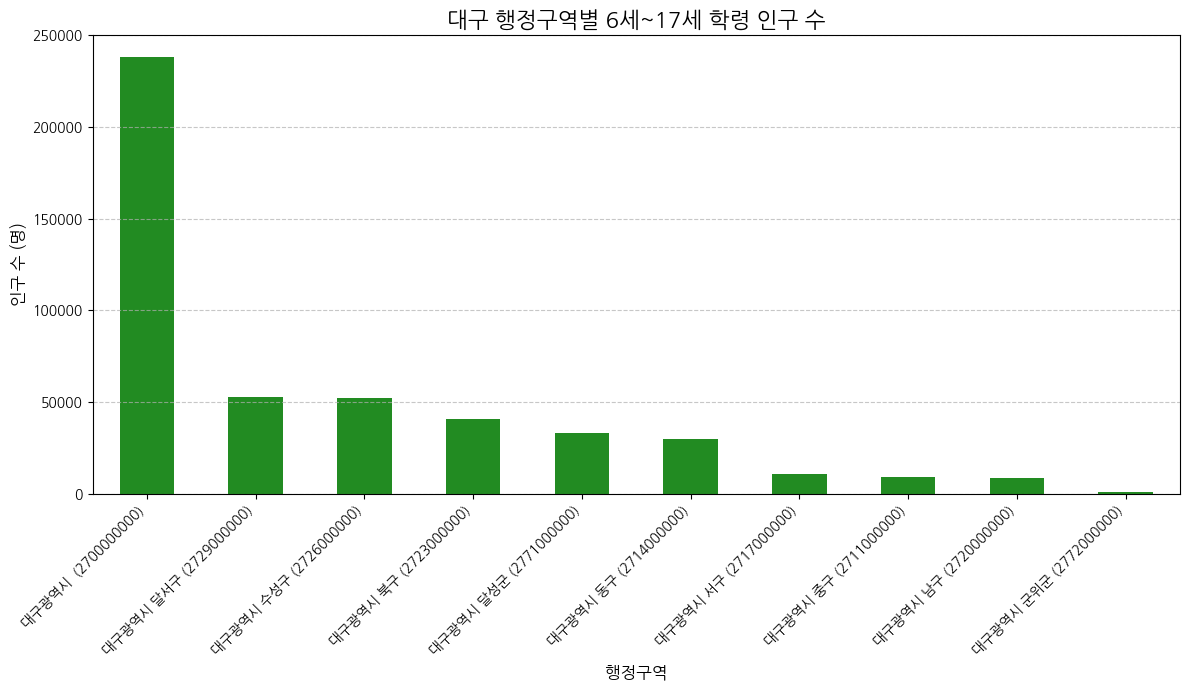


--- 6세~17세 학령 인구 수 ---
행정구역
대구광역시  (2700000000)       238199
대구광역시 달서구 (2729000000)     52914
대구광역시 수성구 (2726000000)     52159
대구광역시 북구 (2723000000)      40780
대구광역시 달성군 (2771000000)     33195
대구광역시 동구 (2714000000)      29935
대구광역시 서구 (2717000000)      10736
대구광역시 중구 (2711000000)       9265
대구광역시 남구 (2720000000)       8400
대구광역시 군위군 (2772000000)       815
dtype: int64


In [17]:
# 7. 학령 인구 (6세 ~ 17세) 계산
# 6세부터 17세 컬럼 리스트 추출
school_age_cols = [col for col in gb.columns if '세' in col and 6 <= get_age(col) <= 17 and '계' in col]

# 학령 인구 합계
school_age_population = gb[school_age_cols].sum(axis=1)

# 8. 학령 인구 시각화
plt.figure(figsize=(12, 7))
school_age_population.sort_values(ascending=False).plot(kind='bar', color='forestgreen')

plt.title('대구 행정구역별 6세~17세 학령 인구 수', fontsize=16)
plt.xlabel('행정구역', fontsize=12)
plt.ylabel('인구 수 (명)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n--- 6세~17세 학령 인구 수 ---")
print(school_age_population.sort_values(ascending=False))